### 하이퍼파라미터
* 예측력을 높이기 위해 사용
* 과대/과소 적합을 방지하기 위해 사용
* 사용자가 지정하는 파라미터

#### 하이퍼파라미터 튜닝 (단점 - 시간이 오래걸림)
* 특정 알고리즘의 매개변수 값을 변경하면서 최적의 파라미터를 찾는 방식
* GridSearchCV클래스를 통해 하이퍼파라미터 탐색과 교차 검증을 한번에 수행

#### GridSearchCV
* 교차 검증으로 하이퍼파라미터 탐색을 수행한다
* 최상의 모델을 찾은 후 훈련 세트 전체를 사용해 최종 모델을 훈련한다
* 매개변수
    - GridSearchCV(모델, param_grid = 파라미터, cv=반복횟수, n_jobs=코어 수(-1, 모든 코어 사용))

### K-최근접 이웃 알고리즘
* 주위에서 가장 가까운 다른 데이터를 보고 현재 데이터를 판단

#### 하이퍼파라미터
* n_neighbors
    - 기본 가까운 5개의 데이터를 보고 자기 자신이 어디에 속하는지를 판단
    - 비교하고자 하는 데이터의 수가 적을 수록 과대 적합이 된다
* metric : 거리계산 척도
    - euclidean(녹색) : 유클리디안 거리 측정
        * 목표 지점까지 가장 짧은 거리
    - manhattan(빨간색) : 맨하튼 거리 측정 방법
        * 찾아가는 경로의 모든 길이의 합
* weights : 가중치
    - uniform : 거리에 가중치 부여하지 않음(균일한 가중치)
    - distance : 거리에 가중치 부여(가까이 있는 데이터에 가중치)

![img](files/images/거리척도.png)

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [72]:
df = pd.read_csv("data/titanic_cleaning.csv")
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


In [73]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [74]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
label = 'Survived'

X, y = df[features], df[label]
X, y

(     Pclass  Sex        Age  SibSp  Parch
 0         3    0  22.000000      1      0
 1         1    1  38.000000      1      0
 2         3    1  26.000000      0      0
 3         1    1  35.000000      1      0
 4         3    0  35.000000      0      0
 ..      ...  ...        ...    ...    ...
 886       2    0  27.000000      0      0
 887       1    1  19.000000      0      0
 888       3    1  29.699118      1      2
 889       1    0  26.000000      0      0
 890       3    0  32.000000      0      0
 
 [891 rows x 5 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

### min max scaler

In [75]:
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X)
X_scaler = minMaxScaler.transform(X)

In [76]:
X_train_minMax, X_test_minMax, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2)

### knn 모델 생성

In [77]:
knn = KNeighborsClassifier()
knn.fit(X_train_minMax, y_train)
print("train : ", knn.score(X_train_minMax, y_train))
print("test : ", knn.score(X_test_minMax, y_test))

train :  0.848314606741573
test :  0.8212290502793296


In [78]:
k_param = range(1, 11) # 1~10까지
for i in k_param:
    print(i)

1
2
3
4
5
6
7
8
9
10


In [79]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_minMax, y_train)
print("train : ", knn.score(X_train_minMax, y_train))
print("test : ", knn.score(X_test_minMax, y_test))

train :  0.8651685393258427
test :  0.7932960893854749


In [80]:
dic = {"k" : k_param, "다른" : k_param}
pd.DataFrame(dic)

,k,다른
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,6
6,7,7
7,8,8
8,9,9
9,10,10


In [81]:
test = []
test.append(100)
test.append(200)
test.append("안녕")

test

[100, 200, '안녕']

In [82]:
dic = {"k" : [1,2,3], "test" : test}
pd.DataFrame(dic)

,k,test
0,1,100
1,2,200
2,3,안녕


In [89]:
k_param = range(1, 20)
train_list = []
test_list = []
num_list = []
best_list = []

for num in k_param:
    knn = KNeighborsClassifier(n_neighbors=num)
    knn.fit(X_train_minMax, y_train)
    num_list.append(num)
    train_list.append(knn.score(X_train_minMax, y_train))
    test_list.append(knn.score(X_test_minMax, y_test))
    best_list.append((knn.score(X_train_minMax, y_train)) - (knn.score(X_test_minMax, y_test)))

dic = {"num" : num_list, "train_score" : train_list, "test_score" : test_list, "best_score" : best_list}
score_df = pd.DataFrame(dic)
score_df

,num,train_score,test_score,best_score
0,1,0.897472,0.737430,0.160042
1,2,0.869382,0.810056,0.059326
2,3,0.865169,0.793296,0.071872
3,4,0.855337,0.826816,0.028521
4,5,0.848315,0.821229,0.027086
5,6,0.835674,0.815642,0.020032
6,7,0.831461,0.826816,0.004645
7,8,0.818820,0.798883,0.019938
8,9,0.823034,0.810056,0.012978
9,10,0.824438,0.782123,0.042315


In [84]:
num_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

<Axes: xlabel='num', ylabel='train_score'>

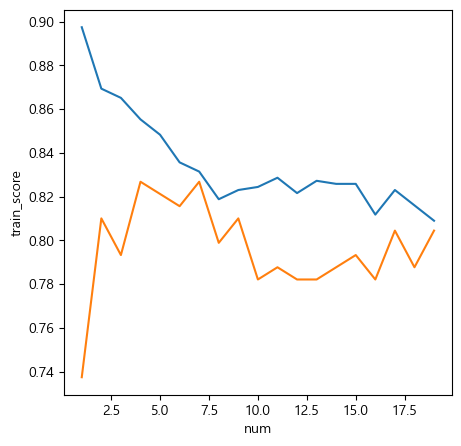

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family="Malgun Gothic")
plt.subplots(figsize = (5,5))
sns.lineplot(x = "num", y = "train_score", data=score_df)
sns.lineplot(x = "num", y = "test_score", data=score_df)

### GridSearchCV
* 폴드를 여러개 만들어 각 각의 섹션에 따라 train과 test를 나눠 테스트한 결과 중 가장 좋은 최적해를 찾아준다.
* GridSearchCV(모델, param_grid=파라미터, cv = 폴드 수, n_jobs = 코어 수)

In [95]:
from sklearn.model_selection import GridSearchCV

k_param = range(1, 11)
params = {"n_neighbors" : k_param}
knn = KNeighborsClassifier()

grid_cv = GridSearchCV(knn, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train_minMax, y_train)
print("최적의 하이퍼 파라미터 : ", grid_cv.best_params_)
print("최고 예측력 : ", grid_cv.best_score_)

print("train : ", grid_cv.score(X_train_minMax, y_train)) # 최적의 해를 토대로 학습한 결과
print("test : ", grid_cv.score(X_test_minMax, y_test))

최적의 하이퍼 파라미터 :  {'n_neighbors': 10}
최고 예측력 :  0.8006008076430611
train :  0.824438202247191
test :  0.7821229050279329


In [97]:
params = {
    "n_neighbors" : range(1, 11),
    "metric" : ["manhattan", "euclidean"],
    "weights" : ["uniform", "distance"]
}

grid_cv = GridSearchCV(knn, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train_minMax, y_train)

print("최적의 하이퍼 파라미터 : ", grid_cv.best_params_)

print("train : ", grid_cv.score(X_train_minMax, y_train))
print("test : ", grid_cv.score(X_test_minMax, y_test))

최적의 하이퍼 파라미터 :  {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
train :  0.8258426966292135
test :  0.7877094972067039
